# Импортируем библиотеки

In [116]:
# импорт библиотек
import pandas as pd
import numpy as np

In [117]:
import pandas as pd
data = pd.read_parquet('train_mfti.parquet', engine='pyarrow')

In [118]:
df = data.copy()

* 1 show_vacancy - просмотр вакансии
* 2 preview_click_vacancy - клик по карточке вакансии
* 3 click_response - отклик со страницы вакансии
* 4 preview_click_response - отклик с карточки вакансии
* 5 click_favorite - добавление вакансии в избранное  со страницы вакансии
* 6 preview_click_favorite - добавление вакансии в избраное с карточки вакансии
* 7 click_contacts - клик на контакты со страницы вакансии
* 8 preview_click_contacts - клик на контакты из карточки вакансии
* 9 click_phone - клик на номер телефона, указанный в вакансии
* 10 preview_click_phone - клик на номер телефона из карточки вакансии

Жирным выделены искомые ""откликнется"" и ""позвонит"""

In [119]:

# Приведение столбцов event_date и event_timestamp к типу datetime
df['event_date'] = pd.to_datetime(df['event_date'])
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s')

# Создание новых столбцов для каждого из признаков, содержащих информацию о дате и времени взаимодействия
df['year'] = df['event_date'].dt.year
df['month'] = df['event_date'].dt.month
df['day'] = df['event_date'].dt.day
df['hour'] = df['event_timestamp'].dt.hour
df['minute'] = df['event_timestamp'].dt.minute

# Создание новых столбцов для каждого уникального значения вакансии и идентификатора пользователя
# df['vacancy_id_'] = df['vacancy_id_'].astype('category').cat.codes
# df['cookie_id'] = df['cookie_id'].astype('category').cat.codes
# df['user_id'] = df['user_id'].astype('category').cat.codes
# df['event_type'] = df['event_type'].astype('category').cat.codes
# Вывод преобразованной таблицы
display(df.head())

event_date     event_timestamp  vacancy_id_  \
0 2022-08-01 2022-08-01 03:03:46       129850   
1 2022-08-01 2022-08-01 18:07:35       108347   
2 2022-08-01 2022-08-01 17:58:15       109069   
3 2022-08-01 2022-08-01 17:58:42       171425   
4 2022-08-01 2022-08-01 17:28:49       252384   

                          cookie_id                           user_id  \
0  97990f1a021d4be19aa3f955b7eacab4  951f53de61764ea0b51317200a0dbbfc   
1  03bf8c511fa949c79845a5d81b09aa1d  f5a2326a17484330aa8cb4019f1b1960   
2  03bf8c511fa949c79845a5d81b09aa1d  f5a2326a17484330aa8cb4019f1b1960   
3  03bf8c511fa949c79845a5d81b09aa1d  f5a2326a17484330aa8cb4019f1b1960   
4  03bf8c511fa949c79845a5d81b09aa1d  f5a2326a17484330aa8cb4019f1b1960   

     event_type  year  month  day  hour  minute  
0  show_vacancy  2022      8    1     3       3  
1  show_vacancy  2022      8    1    18       7  
2  show_vacancy  2022      8    1    17      58  
3  show_vacancy  2022      8    1    17      58  
4  show_vacancy  2022      8    1    17      28

In [120]:
exclude_vacancies = list(set(df['vacancy_id_']))
exclude_cookie = list(set(df['vacancy_id_']))


In [121]:
target_cook = '0034bc7f404341ba8412665453e7825a'

In [122]:
list_of_seen = list(set(df.loc[df.cookie_id == target_cook, 'vacancy_id_']))
print(len(list_of_seen))
print(list_of_seen)
list_of_not_seen = exclude_vacancies
for i in list_of_seen:
    if i in exclude_vacancies:
        list_of_not_seen.remove(i)
print(len(list_of_not_seen))


33
[116494, 195726, 139539, 216980, 235927, 105628, 149923, 247335, 103213, 106033, 190898, 139573, 225848, 227513, 260154, 212411, 213439, 187842, 170694, 217683, 117972, 250327, 257115, 249949, 130142, 117475, 258024, 225645, 182385, 131444, 122614, 105465, 160253]
160134


In [123]:
print(len(list_of_not_seen))
print(list_of_not_seen[:10])

160134
[100001, 100002, 100003, 100004, 100005, 100006, 100007, 100008, 100009, 100010]


In [124]:
features = ['click_contacts',	'click_favorite',	'click_phone',	'click_response', 'preview_click_phone',	'preview_click_response']

In [125]:
df['Good'] = df.apply(lambda row:'Good' if row['event_type'] in features else 'Bad', axis=1)

In [126]:
df['Register'] = df.apply(lambda row:'не зарегистрирован' if row['user_id'] == None else 'зарегистрирован', axis=1)

In [127]:
m=df

In [128]:
df.head()

event_date     event_timestamp  vacancy_id_  \
0 2022-08-01 2022-08-01 03:03:46       129850   
1 2022-08-01 2022-08-01 18:07:35       108347   
2 2022-08-01 2022-08-01 17:58:15       109069   
3 2022-08-01 2022-08-01 17:58:42       171425   
4 2022-08-01 2022-08-01 17:28:49       252384   

                          cookie_id                           user_id  \
0  97990f1a021d4be19aa3f955b7eacab4  951f53de61764ea0b51317200a0dbbfc   
1  03bf8c511fa949c79845a5d81b09aa1d  f5a2326a17484330aa8cb4019f1b1960   
2  03bf8c511fa949c79845a5d81b09aa1d  f5a2326a17484330aa8cb4019f1b1960   
3  03bf8c511fa949c79845a5d81b09aa1d  f5a2326a17484330aa8cb4019f1b1960   
4  03bf8c511fa949c79845a5d81b09aa1d  f5a2326a17484330aa8cb4019f1b1960   

     event_type  year  month  day  hour  minute Good         Register  
0  show_vacancy  2022      8    1     3       3  Bad  зарегистрирован  
1  show_vacancy  2022      8    1    18       7  Bad  зарегистрирован  
2  show_vacancy  2022      8    1    17      58  Bad  зарегистрирован  
3  show_vacancy  2022      8    1    17      58  Bad  зарегистрирован  
4  show_vacancy  2022      8    1    17      28  Bad  зарегистрирован

In [129]:
df_event_type = pd.get_dummies(df['event_type'])
df = pd.concat([df, df_event_type], axis=1)

In [130]:
df.head()

event_date     event_timestamp  vacancy_id_  \
0 2022-08-01 2022-08-01 03:03:46       129850   
1 2022-08-01 2022-08-01 18:07:35       108347   
2 2022-08-01 2022-08-01 17:58:15       109069   
3 2022-08-01 2022-08-01 17:58:42       171425   
4 2022-08-01 2022-08-01 17:28:49       252384   

                          cookie_id                           user_id  \
0  97990f1a021d4be19aa3f955b7eacab4  951f53de61764ea0b51317200a0dbbfc   
1  03bf8c511fa949c79845a5d81b09aa1d  f5a2326a17484330aa8cb4019f1b1960   
2  03bf8c511fa949c79845a5d81b09aa1d  f5a2326a17484330aa8cb4019f1b1960   
3  03bf8c511fa949c79845a5d81b09aa1d  f5a2326a17484330aa8cb4019f1b1960   
4  03bf8c511fa949c79845a5d81b09aa1d  f5a2326a17484330aa8cb4019f1b1960   

     event_type  year  month  day  hour  ...  click_contacts click_favorite  \
0  show_vacancy  2022      8    1     3  ...               0              0   
1  show_vacancy  2022      8    1    18  ...               0              0   
2  show_vacancy  2022      8    1    17  ...               0              0   
3  show_vacancy  2022      8    1    17  ...               0              0   
4  show_vacancy  2022      8    1    17  ...               0              0   

  click_phone  click_response  preview_click_contacts  preview_click_favorite  \
0           0               0                       0                       0   
1           0               0                       0                       0   
2           0               0                       0                       0   
3           0               0                       0                       0   
4           0               0                       0                       0   

   preview_click_phone  preview_click_response  preview_click_vacancy  \
0                    0                       0                      0   
1                    0                       0                      0   
2                    0                       0                      0   
3                    0                       0                      0   
4                    0                       0                      0   

   show_vacancy  
0             1  
1             1  
2             1  
3             1  
4             1  

[5 rows x 23 columns]

In [131]:
df_good_type = pd.get_dummies(df['Good'])
df = pd.concat([df, df_good_type], axis=1)

In [132]:
df_good_type = pd.get_dummies(df['Register'])
df = pd.concat([df, df_good_type], axis=1)

In [133]:
df.columns

Index(['event_date', 'event_timestamp', 'vacancy_id_', 'cookie_id', 'user_id',
       'event_type', 'year', 'month', 'day', 'hour', 'minute', 'Good',
       'Register', 'click_contacts', 'click_favorite', 'click_phone',
       'click_response', 'preview_click_contacts', 'preview_click_favorite',
       'preview_click_phone', 'preview_click_response',
       'preview_click_vacancy', 'show_vacancy', 'Bad', 'Good',
       'зарегистрирован', 'не зарегистрирован'],
      dtype='object')

In [134]:
features2 = ['click_contacts', 'click_favorite',
       'click_phone', 'click_response', 'preview_click_contacts',
       'preview_click_favorite', 'preview_click_phone',
       'preview_click_response', 'preview_click_vacancy', 'show_vacancy',
       'Bad', 'Good', 'зарегистрирован', 'не зарегистрирован']

In [135]:
df_vectorsX = df.groupby('vacancy_id_')[features2].mean()

In [136]:
df_vectorsX

click_contacts  click_favorite  click_phone  click_response  \
vacancy_id_                                                                
100001             0.040816        0.020408     0.000000        0.020408   
100002             0.048406        0.015348     0.014168        0.029516   
100003             0.000000        0.016667     0.000000        0.016667   
100004             0.000000        0.000000     0.000000        0.000000   
100005             0.000000        0.000000     0.000000        0.000000   
...                     ...             ...          ...             ...   
260163             0.000000        0.000000     0.000000        0.000000   
260164             0.000000        0.000000     0.000000        0.000000   
260165             0.000000        0.029412     0.000000        0.039216   
260166             0.076923        0.076923     0.000000        0.000000   
260167             0.022727        0.000000     0.000000        0.022727   

             preview_click_contacts  preview_click_favorite  \
vacancy_id_                                                   
100001                     0.000000                0.020408   
100002                     0.009445                0.001181   
100003                     0.000000                0.000000   
100004                     0.000000                0.000000   
100005                     0.111111                0.000000   
...                             ...                     ...   
260163                     0.000000                0.000000   
260164                     0.000000                0.000000   
260165                     0.009804                0.019608   
260166                     0.000000                0.000000   
260167                     0.000000                0.000000   

             preview_click_phone  preview_click_response  \
vacancy_id_                                                
100001                       0.0                0.040816   
100002                       0.0                0.007084   
100003                       0.0                0.016667   
100004                       0.0                0.000000   
100005                       0.0                0.000000   
...                          ...                     ...   
260163                       0.0                0.000000   
260164                       0.0                1.000000   
260165                       0.0                0.000000   
260166                       0.0                0.000000   
260167                       0.0                0.034091   

             preview_click_vacancy  show_vacancy       Bad      Good  \
vacancy_id_                                                            
100001                    0.387755      0.469388  0.877551  0.122449   
100002                    0.364817      0.510035  0.885478  0.114522   
100003                    0.483333      0.466667  0.950000  0.050000   
100004                    0.250000      0.750000  1.000000  0.000000   
100005                    0.333333      0.555556  1.000000  0.000000   
...                            ...           ...       ...       ...   
260163                    0.500000      0.500000  1.000000  0.000000   
260164                    0.000000      0.000000  0.000000  1.000000   
260165                    0.382353      0.519608  0.931373  0.068627   
260166                    0.307692      0.538462  0.846154  0.153846   
260167                    0.409091      0.511364  0.920455  0.079545   

             зарегистрирован  не зарегистрирован  
vacancy_id_                                       
100001              0.816327            0.183673  
100002              0.700118            0.299882  
100003              0.466667            0.533333  
100004              0.250000            0.750000  
100005              0.777778            0.222222  
...                      ...                 ...  
260163              0.833333            0.166667  
260164              1.00000

In [137]:
df_vectorsTh = df.groupby('cookie_id')[features2].mean()

In [138]:
df_vectorsTh

click_contacts  click_favorite  click_phone  \
cookie_id                                                                       
0000c4548c3944c08972bbdc1fa4eb85        0.000000        0.066667       0.0000   
0000d7508334414ca792c5ff66eb8c14        0.000000        0.000000       0.0000   
0000e63f423542fe8090575b611cea4d        0.000000        0.096774       0.0000   
00013bf3e58244b48d4dbdf43543c30c        0.000000        0.000000       0.0000   
00015019b0594984afc3fd9fa9557490        0.000000        0.098765       0.0000   
...                                          ...             ...          ...   
ffff3581b7e7405db25fac5c5dd1bff9        0.000000        0.000000       0.0000   
ffff42fe199b46d59ce38bde9c95b148        0.012500        0.000000       0.0125   
ffff8283d29644e69ad6d08cc3ca7fb7        0.000000        0.000000       0.0000   
ffffd6d4f2134dd6aa80ff71e942b508        0.259259        0.000000       0.0000   
ffffdb17f45b4032b386d691d52e6c00        0.166667        0.000000       0.0000   

                                  click_response  preview_click_contacts  \
cookie_id                                                                  
0000c4548c3944c08972bbdc1fa4eb85        0.000000                0.000000   
0000d7508334414ca792c5ff66eb8c14        0.000000                0.000000   
0000e63f423542fe8090575b611cea4d        0.161290                0.000000   
00013bf3e58244b48d4dbdf43543c30c        0.090909                0.000000   
00015019b0594984afc3fd9fa9557490        0.000000                0.000000   
...                                          ...                     ...   
ffff3581b7e7405db25fac5c5dd1bff9        0.066667                0.000000   
ffff42fe199b46d59ce38bde9c95b148        0.000000                0.000000   
ffff8283d29644e69ad6d08cc3ca7fb7        0.000000                0.000000   
ffffd6d4f2134dd6aa80ff71e942b508        0.000000                0.037037   
ffffdb17f45b4032b386d691d52e6c00        0.000000                0.250000   

                                  preview_click_favorite  preview_click_phone  \
cookie_id                                                                       
0000c4548c3944c08972bbdc1fa4eb85                     0.0                  0.0   
0000d7508334414ca792c5ff66eb8c14                     0.0                  0.0   
0000e63f423542fe8090575b611cea4d                     0.0                  0.0   
00013bf3e58244b48d4dbdf43543c30c                     0.0                  0.0   
00015019b0594984afc3fd9fa9557490                     0.0                  0.0   
...                                                  ...                  ...   
ffff3581b7e7405db25fac5c5dd1bff9                     0.0                  0.0   
ffff42fe199b46d59ce38bde9c95b148                     0.0                  0.0   
ffff8283d29644e69ad6d08cc3ca7fb7                     0.0                  0.0   
ffffd6d4f2134dd6aa80ff71e942b508                     0.0                  0.0   
ffffdb17f45b4032b386d691d52e6c00                     0.0                  0.0   

                                  preview_click_response  \
cookie_id                                                  
0000c4548c3944c08972bbdc1fa4eb85                0.000000   
0000d7508334414ca792c5ff66eb8c14                0.000000   
0000e63f423542fe8090575b611cea4d                0.000000   
00013bf3e58244b48d4dbdf43543c30c                0.090909   
00015019b0594984afc3fd9fa9557490                0.000000   
...                                                  ...   
ffff3581b7e7405db25fac5c5dd1bff9                0.066667   
ffff42fe199b46d59ce38bde9c95b148                0.000000   
ffff8283d29644e69ad6d08cc3ca7fb7                0.000000   
ffffd6d4f2134dd6aa80ff71e942b508                0.000000   
ffffdb17f45b4032b386d691d52e6c00                0.000000   

                                  preview_click_vacancy  show_vacancy  \
cookie_id                                                               
0000c4548c

In [139]:
for i in [102794, 137587, 257319, 237756, 240744]:
    if i in list_of_not_seen:
        print('Он тут есть')

Он тут есть
Он тут есть
Он тут есть
Он тут есть
Он тут есть


---

ПЕРЕМНОЖЕНИЕ РАСШИРЕННЫЙ ВЕКТОР

In [140]:
dictV = []
cokie_id = '0034bc7f404341ba8412665453e7825a' # пусть это наш выбранный пользователь 
for i in list_of_not_seen: # а это полученная выборка индексов вакансий (ну или id - тогда на loc поменяем)
    Y_11 = np.dot( df_vectorsTh.loc[cokie_id, :], df_vectorsX.loc[i, :] ) # находим вероятность и засовываем ее в словарь
    dictV.append([Y_11, i])

In [141]:
dictV.sort(reverse=True)
print(dictV[:5])

[[2.023529411764706, 257938], [2.023529411764706, 257693], [2.023529411764706, 257445], [2.023529411764706, 255166], [2.023529411764706, 252918]]


0034bc7f404341ba8412665453e7825a	- [102794, 137587, 257319, 237756, 240744, 11348]

---

ПЕРЕМНОЖЕНИЕ УРЕЗАННЫЙ ВЕКТОР

In [142]:
df_vectorsX2 = df_vectorsX.drop(columns=['click_contacts', 
       'click_phone', 'click_response', 'preview_click_contacts', 'preview_click_phone', 'preview_click_vacancy', 'Good', 'зарегистрирован', 'не зарегистрирован'])

In [143]:
df_vectorsTh2 = df_vectorsTh.drop(columns=['click_contacts', 
       'click_phone', 'click_response', 'preview_click_contacts', 'preview_click_phone', 'preview_click_vacancy', 'Good', 'зарегистрирован', 'не зарегистрирован'])

In [144]:
dictV = []
cokie_id = '00013bf3e58244b48d4dbdf43543c30c' # пусть это наш выбранный пользователь 
for i in list_of_not_seen: # а это полученная выборка индексов вакансий (ну или id - тогда на loc поменяем)
    Y_22 = np.dot( df_vectorsTh2.loc[cokie_id, :], df_vectorsX2.loc[i, :] ) # находим вероятность и засовываем ее в словарь
    dictV.append([Y_11, i])

In [145]:
dictV.sort(reverse=True)
print(dictV[:5])

[[1.5175133689839573, 260167], [1.5175133689839573, 260166], [1.5175133689839573, 260165], [1.5175133689839573, 260164], [1.5175133689839573, 260163]]


0034bc7f404341ba8412665453e7825a	- [102794, 137587, 257319, 237756, 240744, 11348]

---

ВЫЧИТАЕНИЕ РАСШИРЕННЫЙ ВЕКТОР

In [146]:
dictV = []
cokie_id = '0034bc7f404341ba8412665453e7825a' # пусть это наш выбранный пользователь 
for i in list_of_not_seen: # а это полученная выборка индексов вакансий (ну или id - тогда на loc поменяем)
    Y_11 = np.linalg.norm( np.subtract(df_vectorsTh.loc[cokie_id, :], df_vectorsX.loc[i, :]) ) # находим вероятность и засовываем ее в словарь
    dictV.append([Y_11, i])

In [147]:
dictV.sort(reverse=True)
print(dictV[:5])

[[2.007253283455936, 260117], [2.007253283455936, 259975], [2.007253283455936, 259738], [2.007253283455936, 259725], [2.007253283455936, 259654]]


[102794, 137587, 257319, 237756, 240744, 11348]

---

ВЫЧИТАНИЕ УРЕЗАННЫЙ ВЕКТОР

---

In [148]:
dictV = []
cokie_id = '0034bc7f404341ba8412665453e7825a' # пусть это наш выбранный пользователь 
for i in list_of_not_seen: # а это полученная выборка индексов вакансий (ну или id - тогда на loc поменяем)
    Y_11 = np.dot(df_vectorsTh.loc[cokie_id, :], df_vectorsX.loc[i, :]) / np.dot(np.linalg.norm( df_vectorsTh.loc[cokie_id, :]), np.linalg.norm(df_vectorsX.loc[i, :]))   # находим вероятность и засовываем ее в словарь
    dictV.append([Y_11, i])

In [149]:
dictV.sort(reverse=False)
print(dictV[:5])

[[0.1668135292637252, 100216], [0.1668135292637252, 100262], [0.1668135292637252, 100275], [0.1668135292637252, 100331], [0.1668135292637252, 100716]]


In [150]:
df_vectorsTh.head()

click_contacts  click_favorite  click_phone  \
cookie_id                                                                       
0000c4548c3944c08972bbdc1fa4eb85             0.0        0.066667          0.0   
0000d7508334414ca792c5ff66eb8c14             0.0        0.000000          0.0   
0000e63f423542fe8090575b611cea4d             0.0        0.096774          0.0   
00013bf3e58244b48d4dbdf43543c30c             0.0        0.000000          0.0   
00015019b0594984afc3fd9fa9557490             0.0        0.098765          0.0   

                                  click_response  preview_click_contacts  \
cookie_id                                                                  
0000c4548c3944c08972bbdc1fa4eb85        0.000000                     0.0   
0000d7508334414ca792c5ff66eb8c14        0.000000                     0.0   
0000e63f423542fe8090575b611cea4d        0.161290                     0.0   
00013bf3e58244b48d4dbdf43543c30c        0.090909                     0.0   
00015019b0594984afc3fd9fa9557490        0.000000                     0.0   

                                  preview_click_favorite  preview_click_phone  \
cookie_id                                                                       
0000c4548c3944c08972bbdc1fa4eb85                     0.0                  0.0   
0000d7508334414ca792c5ff66eb8c14                     0.0                  0.0   
0000e63f423542fe8090575b611cea4d                     0.0                  0.0   
00013bf3e58244b48d4dbdf43543c30c                     0.0                  0.0   
00015019b0594984afc3fd9fa9557490                     0.0                  0.0   

                                  preview_click_response  \
cookie_id                                                  
0000c4548c3944c08972bbdc1fa4eb85                0.000000   
0000d7508334414ca792c5ff66eb8c14                0.000000   
0000e63f423542fe8090575b611cea4d                0.000000   
00013bf3e58244b48d4dbdf43543c30c                0.090909   
00015019b0594984afc3fd9fa9557490                0.000000   

                                  preview_click_vacancy  show_vacancy  \
cookie_id                                                               
0000c4548c3944c08972bbdc1fa4eb85               0.466667      0.466667   
0000d7508334414ca792c5ff66eb8c14               0.500000      0.500000   
0000e63f423542fe8090575b611cea4d               0.225806      0.516129   
00013bf3e58244b48d4dbdf43543c30c               0.181818      0.636364   
00015019b0594984afc3fd9fa9557490               0.345679      0.555556   

                                       Bad      Good  зарегистрирован  \
cookie_id                                                               
0000c4548c3944c08972bbdc1fa4eb85  0.933333  0.066667         1.000000   
0000d7508334414ca792c5ff66eb8c14  1.000000  0.000000         0.000000   
0000e63f423542fe8090575b611cea4d  0.741935  0.258065         1.000000   
00013bf3e58244b48d4dbdf43543c30c  0.818182  0.181818         0.000000   
00015019b0594984afc3fd9fa9557490  0.901235  0.098765         0.938272   

                                  не зарегистрирован  
cookie_id                                             
0000c4548c3944c08972bbdc1fa4eb85            0.000000  
0000d7508334414ca792c5ff66eb8c14            1.000000  
0000e63f423542fe8090575b611cea4d            0.000000  
00013bf3e58244b48d4dbdf43543c30c            1.000000  
00015019b0594984afc3fd9fa9557490            0.061728

In [151]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mtd

In [152]:
a=df_vectorsTh.Good.value_counts()
a.head()

0.000000    139735
0.090909      5158
0.076923      4988
0.066667      4183
0.142857      3930
Name: Good, dtype: int64

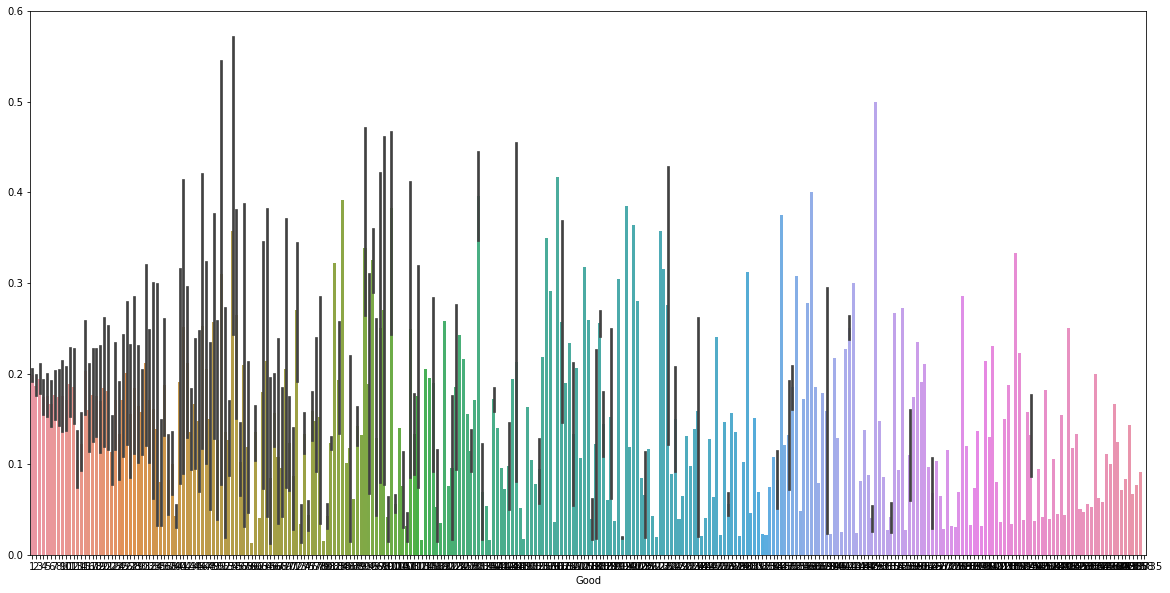

In [153]:
plt.figure(figsize=(20,10))
sns.barplot(y=a.index, x=a)
plt.show()

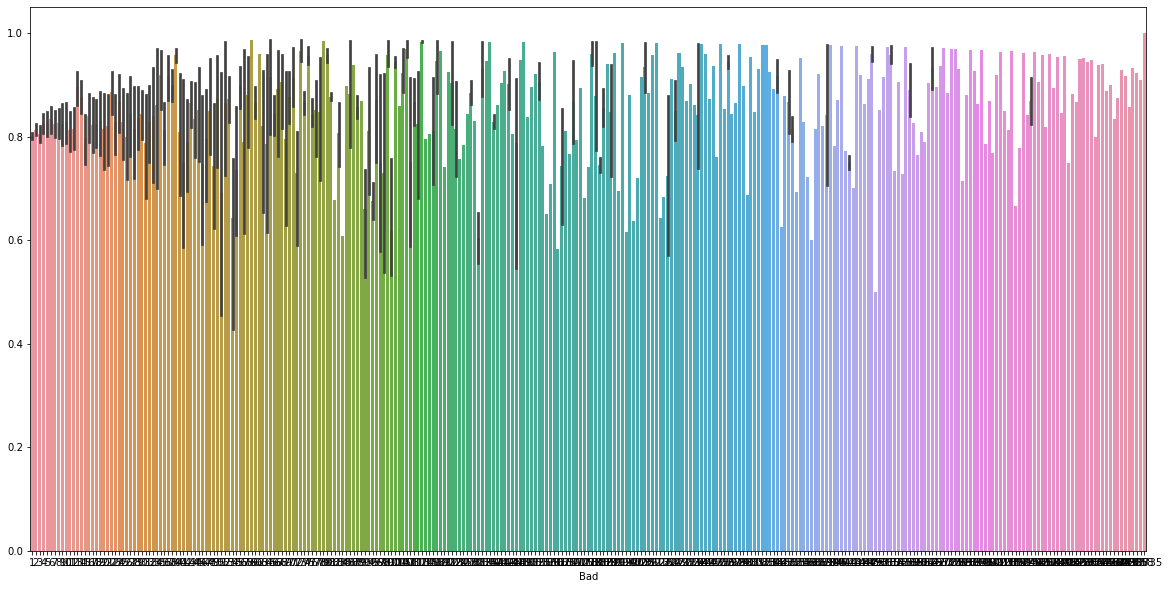

In [154]:
a=df_vectorsTh.Bad.value_counts()
a.head()
plt.figure(figsize=(20,10))
sns.barplot(y=a.index, x=a)
plt.show()

---

[102794, 137587, 257319, 237756, 240744, 11348]

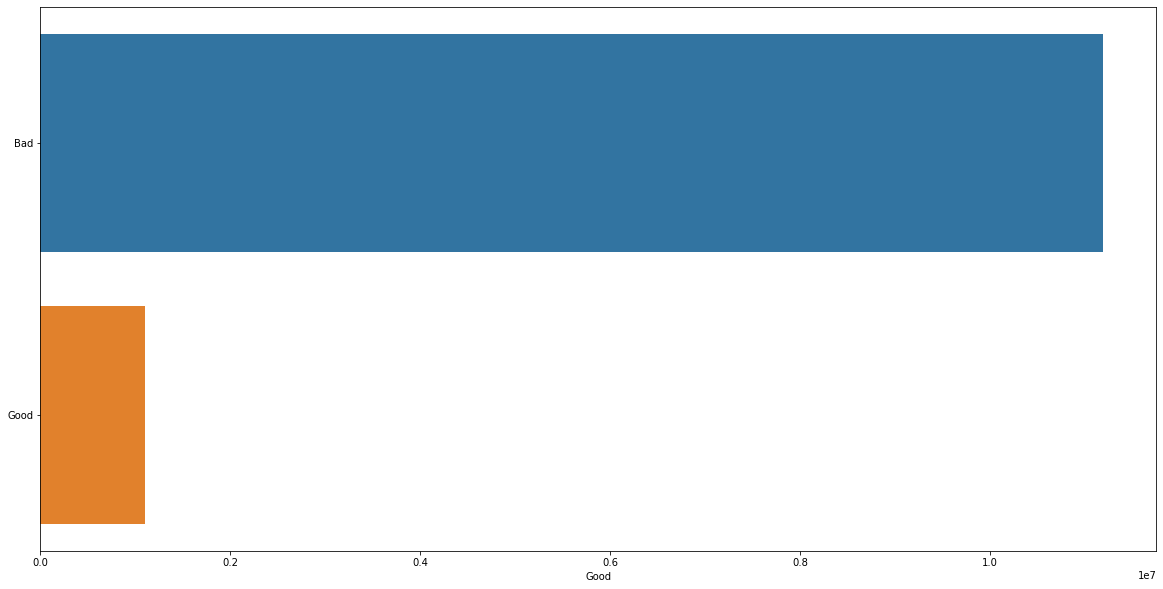

In [155]:
a=m.Good.value_counts()
plt.figure(figsize=(20,10))
sns.barplot(y=a.index, x=a)
plt.show()

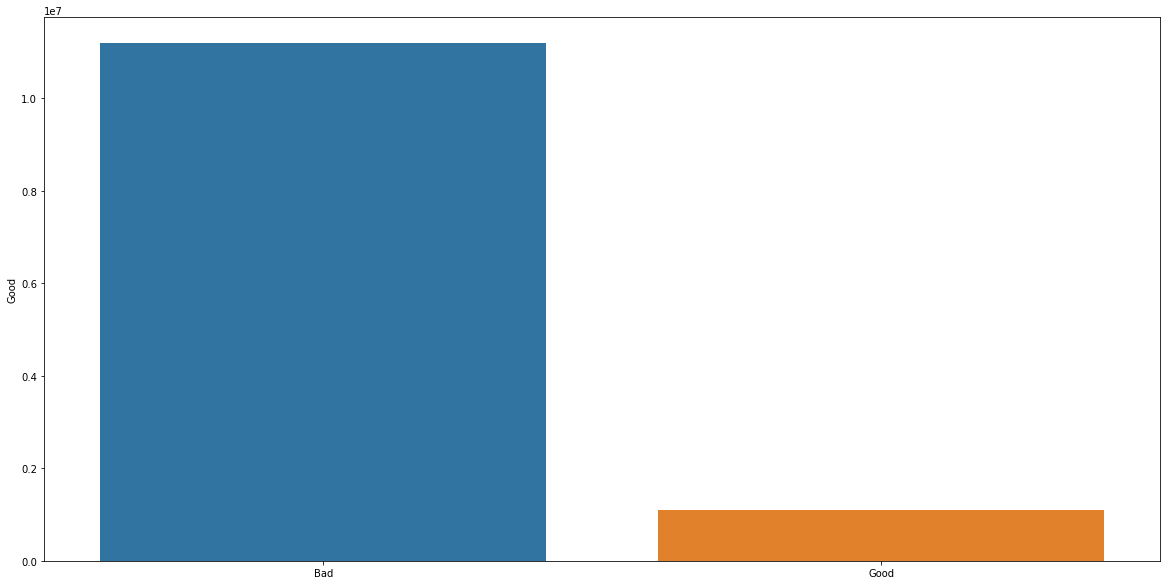

In [156]:
plt.figure(figsize=(20,10))
sns.barplot(x=a.index, y=a)
plt.show()

In [157]:
a=m.value_counts(['hour','Good']).reset_index()
a.columns

Index(['hour', 'Good', 0], dtype='object')

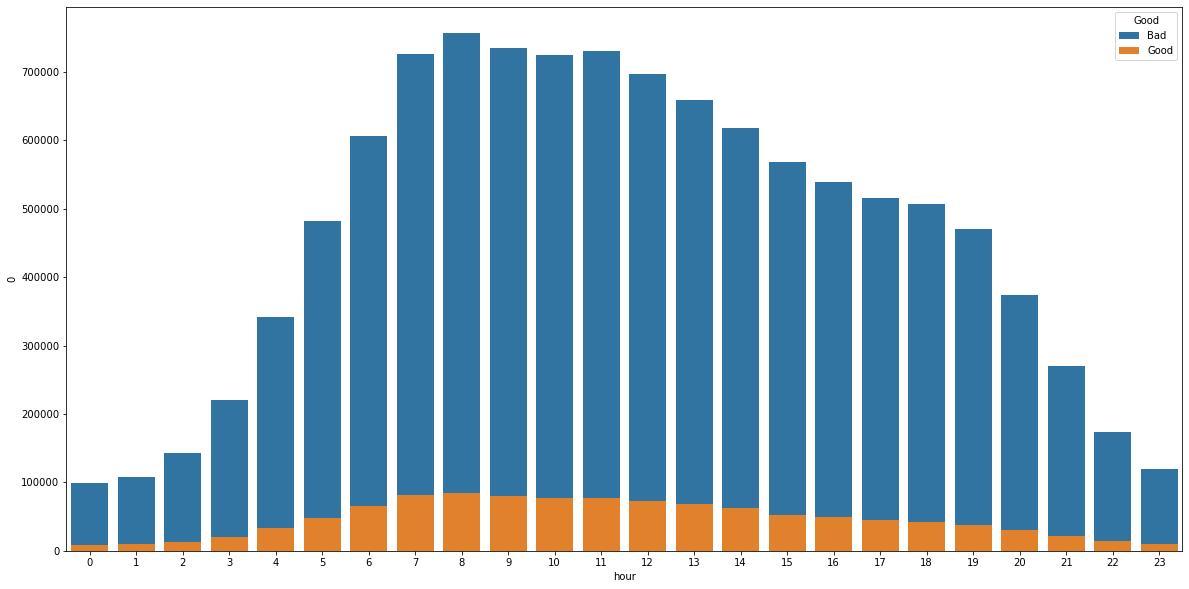

In [159]:
plt.figure(figsize=(20,10))
sns.barplot(y=a[0], x=a.hour, hue=a.Good, dodge=False)
plt.show()

In [164]:
vac=pd.DataFrame()
vac['num_good_vac']=m.groupby(['vacancy_id_']).Good.sum()
vac['num_cookies']=m.groupby('vacancy_id_').cookie_id.nunique()
vac

num_good_vac  num_cookies
vacancy_id_                          
100001                 6           20
100002                97          224
100003                 3           29
100004                 0            3
100005                 0            3
...                  ...          ...
260163                 0            9
260164                 1            1
260165                 7           42
260166                 2            7
260167                 7           30

[160167 rows x 2 columns]

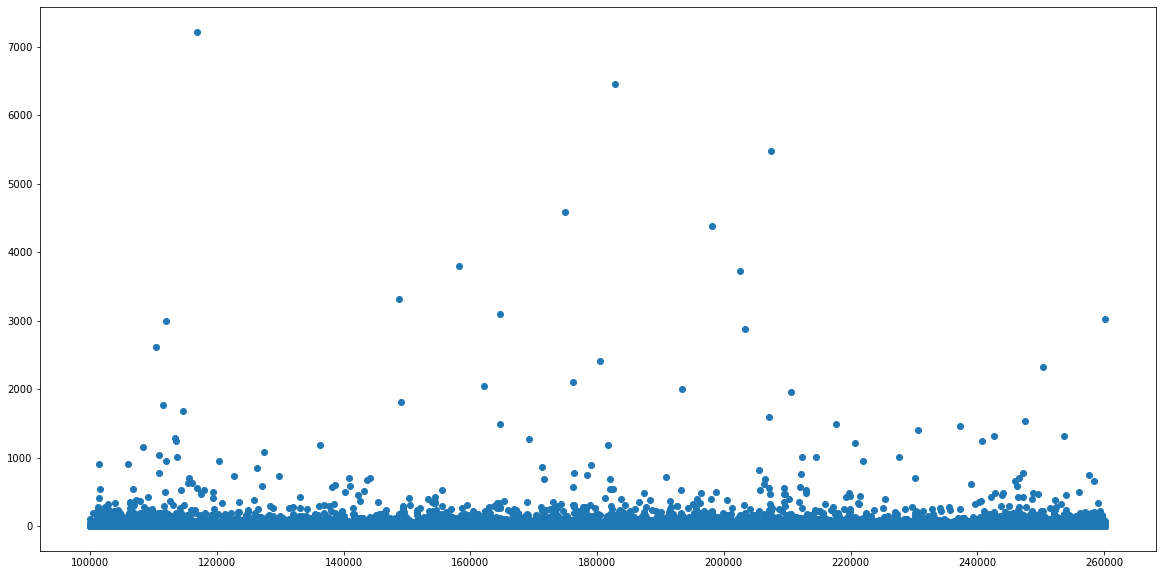

In [171]:
plt.figure(figsize=(20,10))
plt.scatter(vac.index,vac.num_good_vac)
plt.show()

In [177]:
import csv
import warnings
warnings.filterwarnings("ignore")
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline


In [180]:
px.scatter(vac.num_good_vac)
